# Task 6.2 - Exploring Relationships

## Importing Libraries and Setup

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# creating path variable
path = r'/Users/paigepearson/Desktop/Data Analytics/Immersion Course/Achievement 6/Boat Dashboard'

In [3]:
# checking version of matplotlib
matplotlib.__version__

'3.7.2'

In [4]:
# make sure charts are shown in notebook
%matplotlib inline

In [5]:
# importing data
df_boat = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'boat_cleaned2.csv'))

In [6]:
# checking data
df_boat.head()

,Unnamed: 0,Country,Currency,Price in EUR,Manufacturer,Boat Type,Condition Type,Propulsion Type,Year Built,Material,Length,Width,Number of Views Last 7 Days
0,0,Switzerland,CHF,3476,Rigiflex power boats,Motor Yacht,New Boat From Stock,NaN,2017,NaN,4.00,1.90,226
1,1,Germany,EUR,3490,Terhi power boats,Center console boat,New Boat From Stock,NaN,2020,Thermoplastic,4.00,1.50,75
2,3,Denmark,DKK,3472,Pioner power boats,Sport Boat,New Boat From Stock,NaN,2020,NaN,3.00,1.00,64
3,4,Germany,EUR,3399,Linder power boats,Fishing Boat,New Boat From Stock,NaN,2019,Aluminium,3.55,1.46,58
4,6,Switzerland,CHF,3750,NaN,Catamaran,Used Boat,Unleaded,1999,Aluminium,6.20,2.38,474


In [7]:
# removing Unnamed column that sometimes pops up
df_boat = df_boat.drop(columns = 'Unnamed: 0')

In [8]:
#checking work
df_boat.head()

,Country,Currency,Price in EUR,Manufacturer,Boat Type,Condition Type,Propulsion Type,Year Built,Material,Length,Width,Number of Views Last 7 Days
0,Switzerland,CHF,3476,Rigiflex power boats,Motor Yacht,New Boat From Stock,NaN,2017,NaN,4.00,1.90,226
1,Germany,EUR,3490,Terhi power boats,Center console boat,New Boat From Stock,NaN,2020,Thermoplastic,4.00,1.50,75
2,Denmark,DKK,3472,Pioner power boats,Sport Boat,New Boat From Stock,NaN,2020,NaN,3.00,1.00,64
3,Germany,EUR,3399,Linder power boats,Fishing Boat,New Boat From Stock,NaN,2019,Aluminium,3.55,1.46,58
4,Switzerland,CHF,3750,NaN,Catamaran,Used Boat,Unleaded,1999,Aluminium,6.20,2.38,474


In [9]:
# shortening the name of one column that is too long to fit on charts
df_boat.rename(columns={'Number of Views Last 7 Days': 'Views'}, inplace=True)

## Create a Subset of Variables

In [10]:
df_boat.describe()

,Price in EUR,Year Built,Length,Width,Views
count,9.234000e+03,9234.000000,9234.000000,9234.000000,9234.000000
mean,3.021898e+05,2004.933398,11.719805,3.553119,150.149339
std,9.385018e+05,16.391599,5.998561,1.212155,154.596330
min,3.300000e+03,1885.000000,1.040000,0.010000,13.000000
25%,4.490000e+04,1999.000000,7.560000,2.550000,70.000000
50%,9.585100e+04,2008.000000,10.500000,3.390000,108.000000
75%,2.498308e+05,2018.000000,14.000000,4.260000,172.000000
max,3.100000e+07,2021.000000,100.000000,25.160000,3263.000000


In [11]:
# creating a subset with the numerical variables needed for charts
mini_boat = df_boat[['Price in EUR', 'Year Built', 'Length', 'Width', 'Views']]

In [12]:
# checking work
mini_boat.head()

,Price in EUR,Year Built,Length,Width,Views
0,3476,2017,4.00,1.90,226
1,3490,2020,4.00,1.50,75
2,3472,2020,3.00,1.00,64
3,3399,2019,3.55,1.46,58
4,3750,1999,6.20,2.38,474


## Create a Correlation Matrix Heatmap

In [13]:
# create a correlation matrix using pandas
mini_boat.corr()

,Price in EUR,Year Built,Length,Width,Views
Price in EUR,1.000000,0.104925,0.561956,0.519362,-0.007390
Year Built,0.104925,1.000000,-0.204776,-0.105410,-0.113930
Length,0.561956,-0.204776,1.000000,0.868686,-0.137605
Width,0.519362,-0.105410,0.868686,1.000000,-0.163117
Views,-0.007390,-0.113930,-0.137605,-0.163117,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

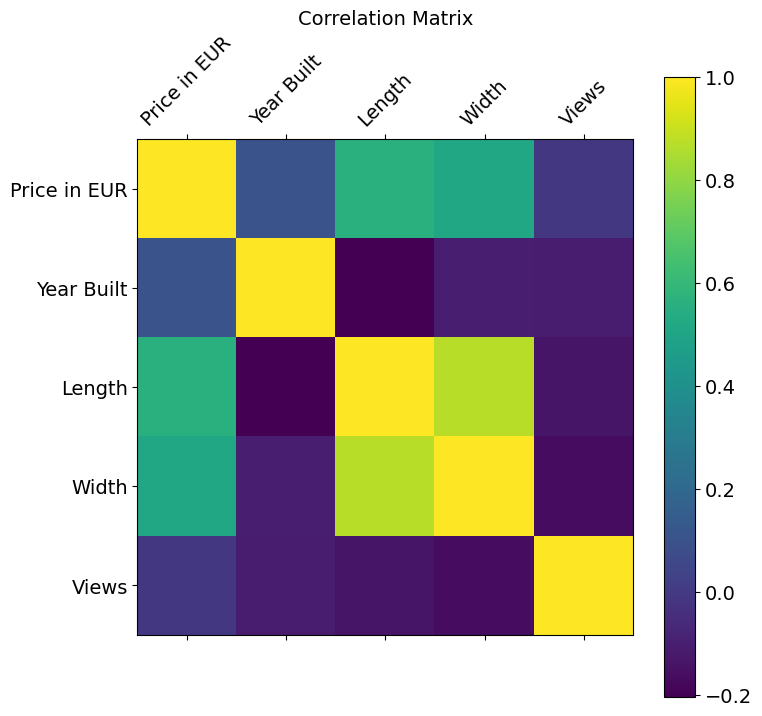

In [14]:
# creating a correlation matrix heatmap using matplotlib

f = plt.figure(figsize=(8, 8))
plt.matshow(mini_boat.corr(), fignum=f.number)
plt.xticks(range(mini_boat.shape[1]), mini_boat.columns, fontsize=14, rotation=45) 
plt.yticks(range(mini_boat.shape[1]), mini_boat.columns, fontsize=14) 
cb = plt.colorbar() 
cb.ax.tick_params(labelsize=14) 
plt.title('Correlation Matrix', fontsize=14) 

Note: That looks fantastic! However, I like the style of the seaborn heatmap better so I will be using that one.

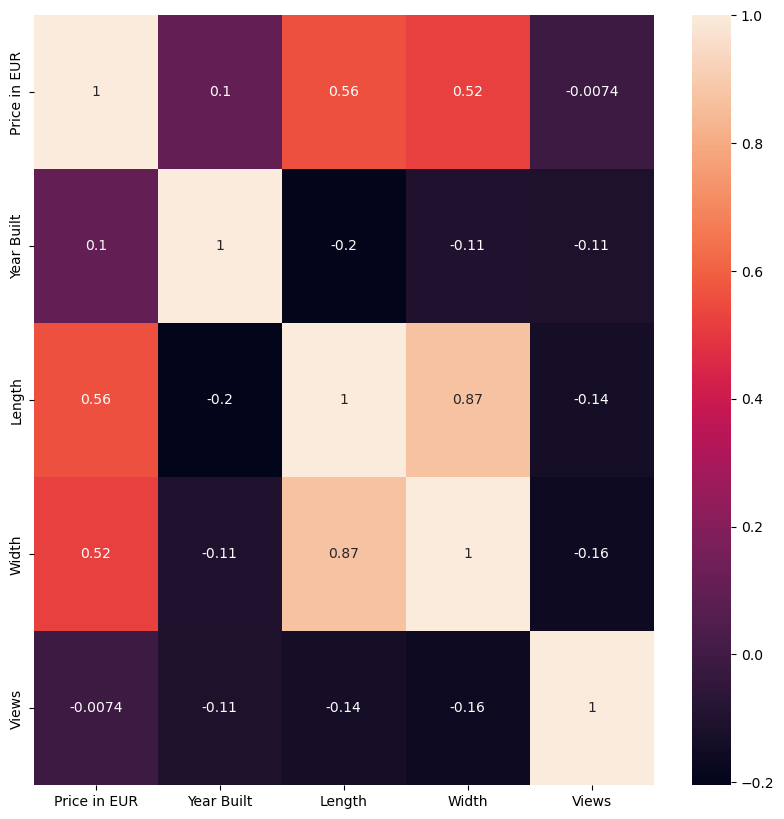

In [15]:
# creating a correlation matrix heatmap using seaborn

# creating a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# creating the correlation heatmap in seaborn 
corr = sns.heatmap(mini_boat.corr(), annot = True, ax = ax) 

Observations:

Some of the higher correlations are not helpful to further analysis. The correlation between width and length is fundamental to boat-making so this will be ignored.

It makes sense to me that price would have very little impact on online views. Many people look at things online that they cannot afford for fun. I myself have skimmed over real estate websites well above what I can potentially buy. 

It is interesting to look see that the price has a weak correlation to the year a boat was built. I expected there to be more correlation but I will explore those two in a diffent chart perhaps. For now I will go forward with looking at Price in EUR against Width, Length, and Year Built.

## Create a Scatterplot

In [16]:
# Setting the stying of the Seaborn figure
sns.set_style('darkgrid')

/Users/paigepearson/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


([<matplotlib.axis.XTick at 0x169d9c5d0>,
 [Text(0, 0, '0'),
  Text(4000000, 0, '4'),
  Text(8000000, 0, '8'),
  Text(12000000, 0, '12'),
  Text(16000000, 0, '16'),
  Text(20000000, 0, '20'),
  Text(24000000, 0, '24'),
  Text(28000000, 0, '28'),
  Text(32000000, 0, '32')])

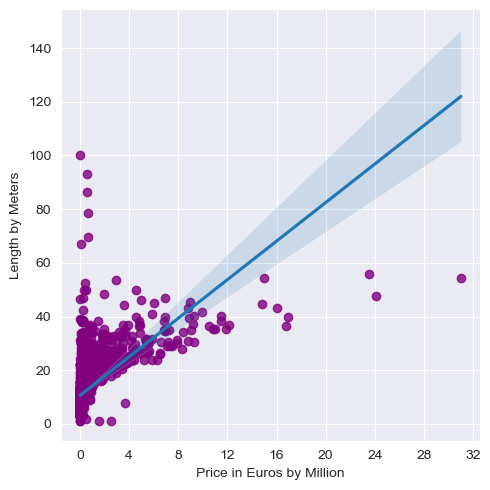

In [17]:
# creating scatterplot of 'Price in EUR' and 'Length'
scatter_price_length = sns.lmplot(x='Price in EUR', y='Length', data=mini_boat, scatter_kws={'color': 'purple'})

# setting axis labels
plt.xlabel('Price in Euros by Million')
plt.ylabel('Length by Meters')
plt.xticks([0, 4000000, 8000000, 12000000, 16000000, 20000000, 24000000, 28000000, 32000000], ['0', '4', '8', '12', '16', '20', '24', '28', '32'])

Note: I have trouble understanding scatterplots, and while it looks like there is a lot of correlation at lower prices, once it gets past a certain point the outliers are far away from any sort of connection to the price.

I will not be using python to extract these charts and rather save them by right clicking and saving the image to my desktop. I have found that python cuts off parts of the charts and I almost always have to go back through and redo them.

/Users/paigepearson/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


([<matplotlib.axis.XTick at 0x169e97b10>,
 [Text(0, 0, '0'),
  Text(4000000, 0, '4'),
  Text(8000000, 0, '8'),
  Text(12000000, 0, '12'),
  Text(16000000, 0, '16'),
  Text(20000000, 0, '20'),
  Text(24000000, 0, '24'),
  Text(28000000, 0, '28'),
  Text(32000000, 0, '32')])

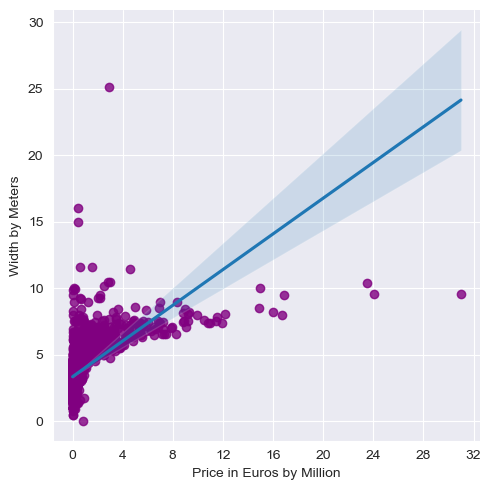

In [18]:
# creating scatterplot of 'Price in EUR' and 'Width'
scatter_price_width = sns.lmplot(x = 'Price in EUR', y = 'Width', data = mini_boat, scatter_kws={'color': 'purple'})

# setting axis labels
plt.xlabel('Price in Euros by Million')
plt.ylabel('Width by Meters')
plt.xticks([0, 4000000, 8000000, 12000000, 16000000, 20000000, 24000000, 28000000, 32000000], ['0', '4', '8', '12', '16', '20', '24', '28', '32'])

/Users/paigepearson/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(1880.0, 2040.0)

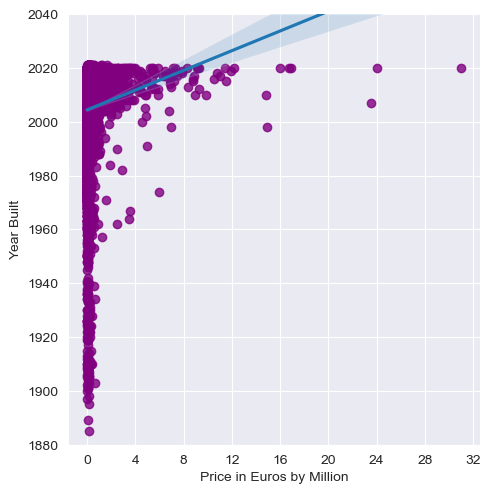

In [19]:
# creating scatterplot of 'Price in EUR' and 'Year Built'
scatter_price_year = sns.lmplot(x = 'Price in EUR', y = 'Year Built', data = mini_boat, scatter_kws={'color': 'purple'})

# setting axis labels
plt.xlabel('Price in Euros by Million')
plt.ylabel('Year Built')
plt.xticks([0, 4000000, 8000000, 12000000, 16000000, 20000000, 24000000, 28000000, 32000000], ['0', '4', '8', '12', '16', '20', '24', '28', '32'])
plt.yticks([1880, 1900, 1920, 1940, 1960, 1980, 2000, 2020, 2040])
plt.ylim(1880, 2040)

## Creating a Pair Plot of all Variables

/Users/paigepearson/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


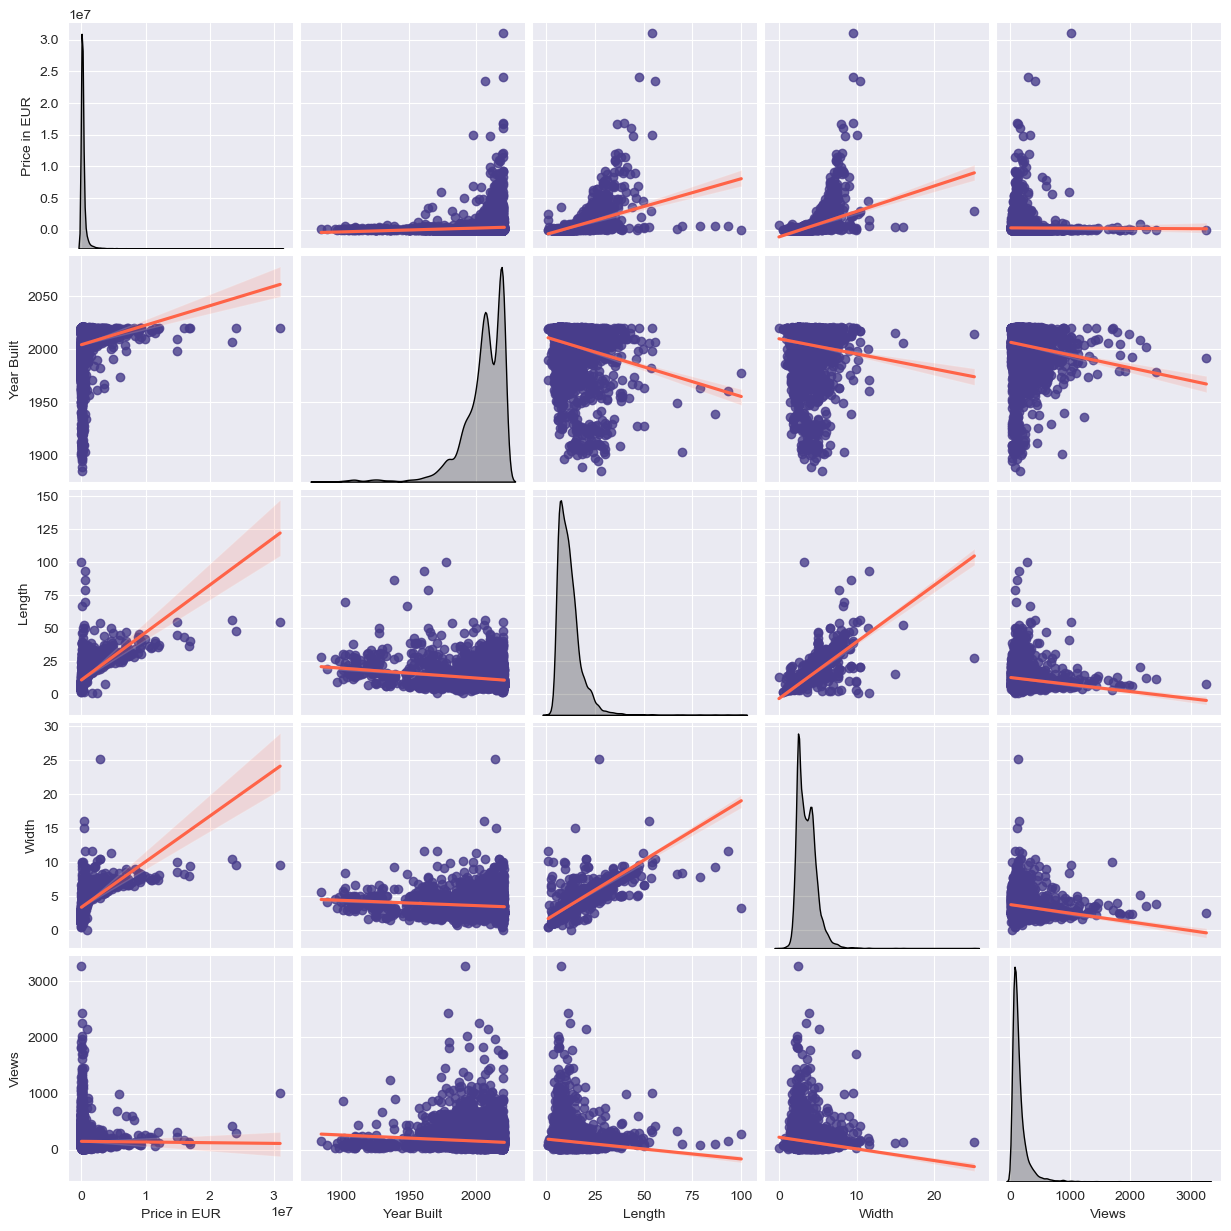

In [20]:
# create pairplot
pairplot = sns.pairplot(mini_boat, 
                       kind='reg', 
                       diag_kind='kde', 
                       plot_kws={'color':'darkslateblue', 'line_kws':{'color':'tomato'}}, 
                       diag_kws={'color':'black'})

Observations:

Based on the pair plot alone there aren't a lot of numerical variables that have a very strong relationship outside of the price, width, and length variables. There are a number of outliers in these charts that would be interesting to remove and see how the various charts shift, especially the heatmap. I think at this point I will continue with the rest of the task's charts, but make a second script that has a modified subset that filters out the outliers of each column and redo the charts for comparison. The relationship between views and something is most likely in one of the qualitative variables, and is more nuanced than I will find in the numerical data.

## Creating Categorical Charts

### Examining Variables with Histograms

(0.0, 5000.0)

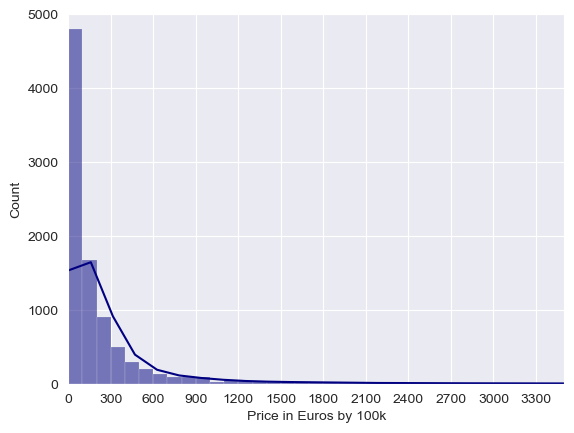

In [21]:
# creating histogram of the 'Price in EUR' variable

# Set the bin size and range
bin_size = 100000
x_range = range(0, 3500000, bin_size)

# Create the histogram
sns.histplot(mini_boat['Price in EUR'], bins=x_range, kde=True, color='navy', edgecolor='white')

# Set x-axis label
plt.xlabel('Price in Euros by 100k')

# Set x-axis ticks every 20,000 with shortened "20" labels
x_ticks = range(0, 3500000, 300000)
x_tick_labels = [str(x // 1000) for x in x_ticks]

# Adjust the x-axis tick positions and labels
plt.xticks(x_ticks, x_tick_labels)

# Set x-axis range limit
plt.xlim(0, 3500000)
plt.ylim(0, 5000)

(0.0, 2000.0)

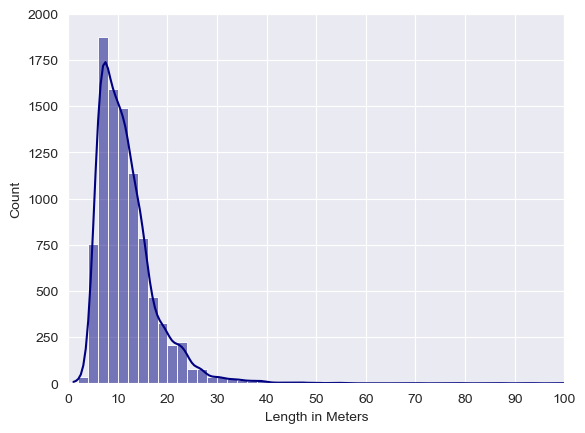

In [22]:
# Set the bin size and range
bin_size = 2
x_range = range(0, 101, bin_size)

# Create the histogram
sns.histplot(mini_boat['Length'], bins=x_range, kde=True, color='navy', edgecolor='white')

# Set x-axis label
plt.xlabel('Length in Meters')

# Set x-axis ticks every 10
x_ticks = range(0, 101, 10)
x_tick_labels = [str(x) for x in x_ticks]

# Adjust the x-axis tick positions and labels
plt.xticks(x_ticks, x_tick_labels)

# Set x-axis range limit
plt.xlim(0, 100)
plt.ylim(0, 2000)

(0.0, 30.0)

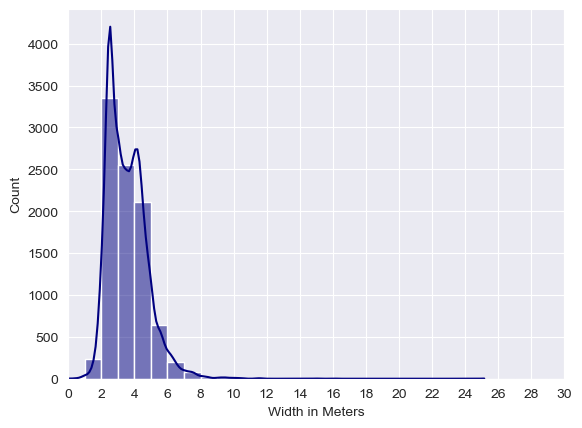

In [23]:
# creating histogram of the 'Width' variable

# Set the bin size and range
bin_size = 1
x_range = range(0, 31, bin_size)

# Create the histogram
sns.histplot(mini_boat['Width'], bins=x_range, kde=True, color='navy', edgecolor='white')

# Set x-axis label
plt.xlabel('Width in Meters')

# Set x-axis ticks every 2
x_ticks = range(0, 31, 2)

# Adjust the x-axis tick positions
plt.xticks(x_ticks)

# Set x-axis range limit
plt.xlim(0, 30)

Observation: The price histogram is greatly affected by outliers, as are the other charts to a certain degree.

### Creating Flags for Categorical Plot

Note: I feel that the price histogram didn't reveal enough information for me to decide upon categorical limits for the next section, so in 6.2 - Part 2 I will see if filtering out the outliers will help me to decide, then come back and finish the categorical charts here in 6.2 - Part 1.

Because I have no knowledge of whether or not a certain size of boat is long or shot, wide or narrow, and thse things really depend on the type of boat such categories wouldn't hold up to scrutiny. The best I could come up with is uncommon/common width/length which may or may not be useful I haven't decided.

In [24]:
# creating Price Range flag
mini_boat.loc[mini_boat['Price in EUR'] <= 10000, 'Price Range'] = 'Low Range'
mini_boat.loc[(mini_boat['Price in EUR'] > 10000) & (mini_boat['Price in EUR'] <= 100000), 'Price Range'] = 'Mid Range'
mini_boat.loc[(mini_boat['Price in EUR'] > 100000) & (mini_boat['Price in EUR'] <= 350000), 'Price Range'] = 'High Range'
mini_boat.loc[mini_boat['Price in EUR'] > 350000, 'Price Range'] = 'Luxury Range'


/var/folders/vr/dtw_gx814dz__p2jnh_scllw0000gn/T/ipykernel_46342/114517031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_boat.loc[mini_boat['Price in EUR'] <= 10000, 'Price Range'] = 'Low Range'


In [25]:
# checking work
mini_boat.head()

,Price in EUR,Year Built,Length,Width,Views,Price Range
0,3476,2017,4.00,1.90,226,Low Range
1,3490,2020,4.00,1.50,75,Low Range
2,3472,2020,3.00,1.00,64,Low Range
3,3399,2019,3.55,1.46,58,Low Range
4,3750,1999,6.20,2.38,474,Low Range


In [26]:
mini_boat['Price Range'].value_counts(dropna = False)

Price Range
Mid Range       4594
High Range      2817
Luxury Range    1590
Low Range        233
Name: count, dtype: int64

/Users/paigepearson/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


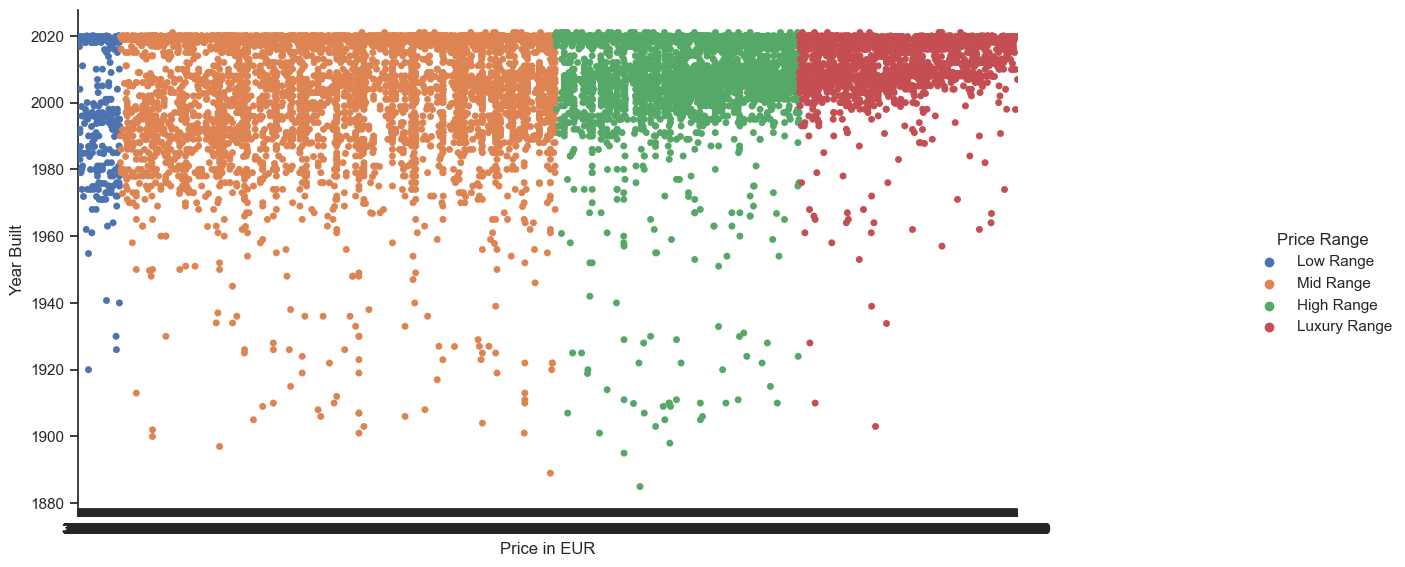

In [27]:
# creating categorical plot
sns.set(style="ticks")
g = sns.catplot(x="Price in EUR", y="Year Built", hue="Price Range", data=mini_boat)

# Double the width of the chart
g.fig.set_size_inches(16, 6)

Observation: Chart was unreadable with variables switched on axis. Unable to set tick marks on the x axis without problems, and I can't remove black bars. I am still unsure if the limits I set on the price range is right or if it should be shifted. Scatterplots are going to be my downfall I just know it.

/Users/paigepearson/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


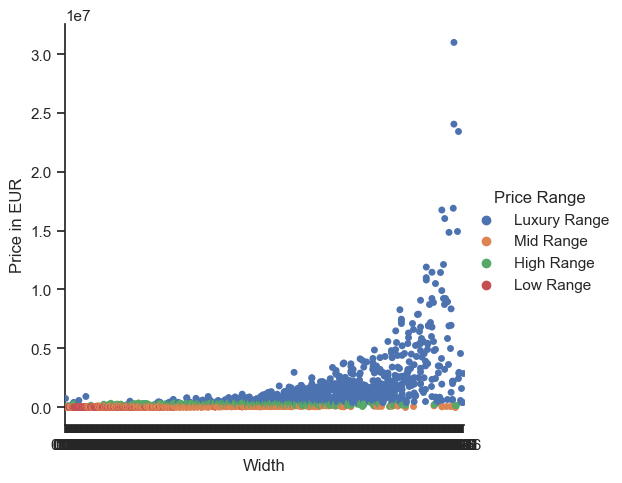

In [29]:
# Define the data
sns.set(style="ticks")
g = sns.catplot(y="Price in EUR", x="Width", hue="Price Range", data=mini_boat)

# Set the x-axis ticks every 2 units
#tick_positions = np.arange(0, 28, 2)
#g.ax.set_xticks(tick_positions)

# Double the width of the chart
#g.fig.set_size_inches(16, 6)

/Users/paigepearson/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


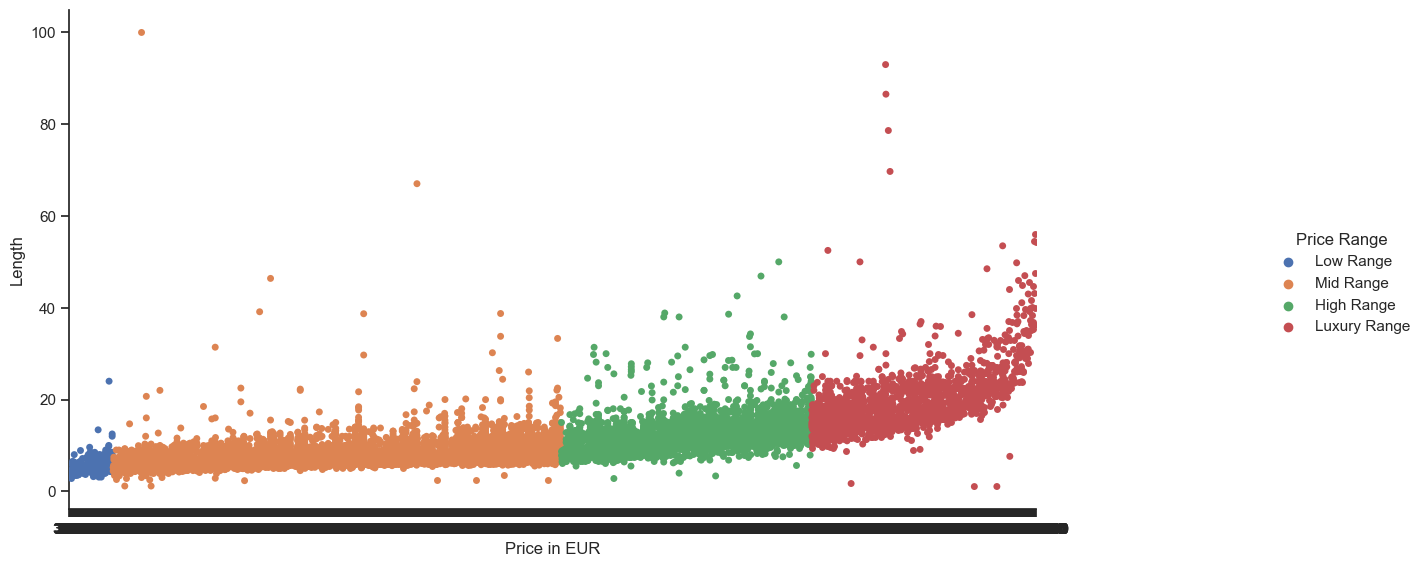

In [30]:
# creating categorical plot
sns.set(style="ticks")
g = sns.catplot(x="Price in EUR", y="Length", hue="Price Range", data=mini_boat)

# Double the width of the chart
g.fig.set_size_inches(16, 6)

Note: Cannot seem to fix these charts to be useable, will get tutor feedback first.